<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.027212,172.604595,281.631807,-98.024028,379.655835
1,0.0,1.0,86.788515,-843.691828,-746.903313,-57.933264,-688.970049
2,0.0,2.0,83.048382,670.523293,763.571674,-45.681568,809.253242
3,0.0,3.0,79.170644,-617.822815,-528.652171,-32.979116,-495.673055
4,0.0,4.0,56.314747,308.610592,374.925339,41.890816,333.034523
...,...,...,...,...,...,...,...
119995,999.0,115.0,61.000274,19.362530,90.362804,174.502318,-84.139513
119996,999.0,116.0,62.813922,1866.617485,1939.431407,188.440888,1750.990519
119997,999.0,117.0,35.773030,-199.083178,-153.310148,-19.378643,-133.931505
119998,999.0,118.0,87.227960,290.316114,387.544074,376.072051,11.472023


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    99.027212   172.604595   281.631807  -98.024028   379.655835
      1.0    86.788515  -843.691828  -746.903313  -57.933264  -688.970049
      2.0    83.048382   670.523293   763.571674  -45.681568   809.253242
      3.0    79.170644  -617.822815  -528.652171  -32.979116  -495.673055
      4.0    56.314747   308.610592   374.925339   41.890816   333.034523
...                ...          ...          ...         ...          ...
999.0 115.0  61.000274    19.362530    90.362804  174.502318   -84.139513
      116.0  62.813922  1866.617485  1939.431407  188.440888  1750.990519
      117.0  35.773030  -199.083178  -153.310148  -19.378643  -133.931505
      118.0  87.227960   290.316114   387.544074  376.072051    11.472023
      119.0  49.992154  -724.920642  -664.928487   89.900731  -754.829218

[120000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    99.027212   172.604595   281.631807  -98.024028   379.655835
      1.0    86.788515  -843.691828  -746.903313  -57.933264  -688.970049
      2.0    83.048382   670.523293   763.571674  -45.681568   809.253242
      3.0    79.170644  -617.822815  -528.652171  -32.979116  -495.673055
      4.0    56.314747   308.610592   374.925339   41.890816   333.034523
...                ...          ...          ...         ...          ...
999.0 115.0  61.000274    19.362530    90.362804  174.502318   -84.139513
      116.0  62.813922  1866.617485  1939.431407  188.440888  1750.990519
      117.0  35.773030  -199.083178  -153.310148  -19.378643  -133.931505
      118.0  87.227960   290.316114   387.544074  376.072051    11.472023
      119.0  49.992154  -724.920642  -664.928487   89.900731  -754.829218

[120000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.027212,172.604595,281.631807,-98.024028,379.655835
1,0.0,1.0,86.788515,-843.691828,-746.903313,-57.933264,-688.970049
2,0.0,2.0,83.048382,670.523293,763.571674,-45.681568,809.253242
3,0.0,3.0,79.170644,-617.822815,-528.652171,-32.979116,-495.673055
4,0.0,4.0,56.314747,308.610592,374.925339,41.890816,333.034523
...,...,...,...,...,...,...,...
119995,999.0,115.0,61.000274,19.362530,90.362804,174.502318,-84.139513
119996,999.0,116.0,62.813922,1866.617485,1939.431407,188.440888,1750.990519
119997,999.0,117.0,35.773030,-199.083178,-153.310148,-19.378643,-133.931505
119998,999.0,118.0,87.227960,290.316114,387.544074,376.072051,11.472023


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    99.027212   172.604595   281.631807  -98.024028   379.655835
      1.0    86.788515  -843.691828  -746.903313  -57.933264  -688.970049
      2.0    83.048382   670.523293   763.571674  -45.681568   809.253242
      3.0    79.170644  -617.822815  -528.652171  -32.979116  -495.673055
      4.0    56.314747   308.610592   374.925339   41.890816   333.034523
...                ...          ...          ...         ...          ...
999.0 115.0  61.000274    19.362530    90.362804  174.502318   -84.139513
      116.0  62.813922  1866.617485  1939.431407  188.440888  1750.990519
      117.0  35.773030  -199.083178  -153.310148  -19.378643  -133.931505
      118.0  87.227960   290.316114   387.544074  376.072051    11.472023
      119.0  49.992154  -724.920642  -664.928487   89.900731  -754.829218

[120000 rows x 5 columns]

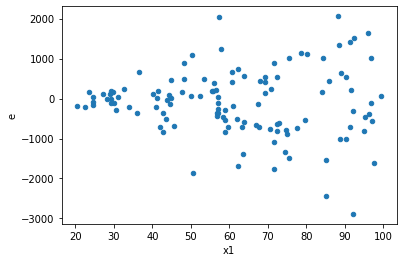

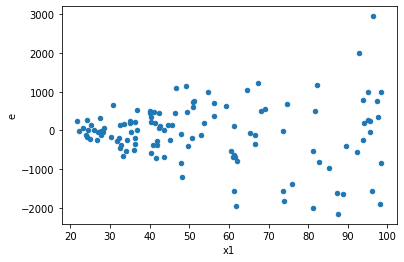

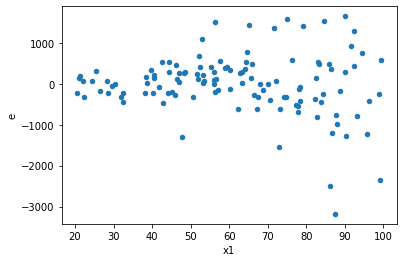

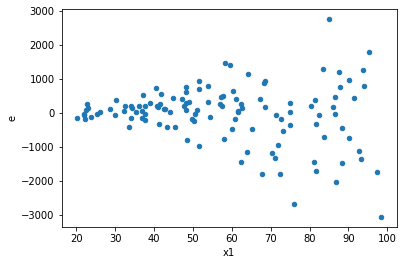

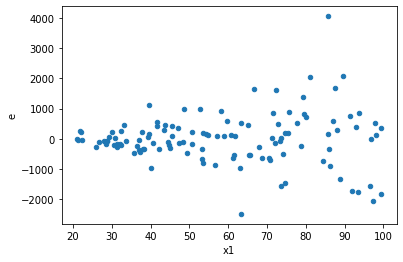

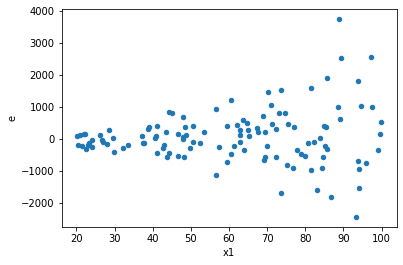

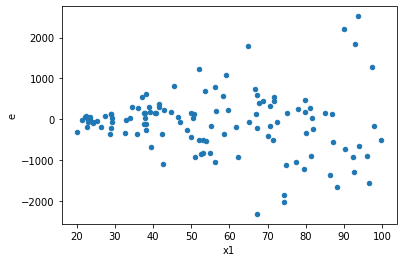

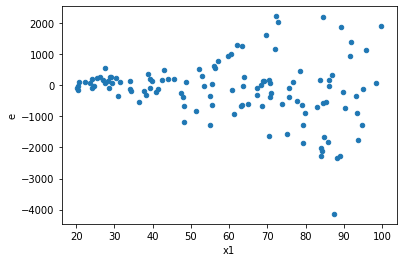

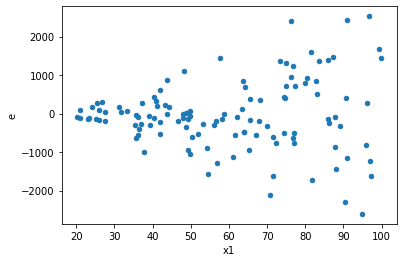

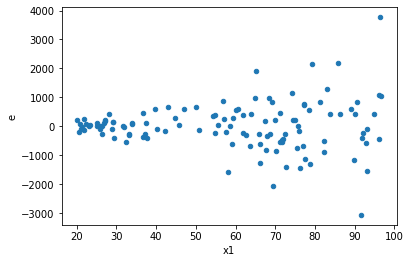

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,46.0,72.0,5198593.753642344,75763785.59624073,113012.90768787704,1052274.799947788,9.311102788842465,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,59.0,59.0,8384488.144348875,83601047.37402152,142109.968548286,1416966.9046444325,9.970918431123124,8.881784197001252e-16,0.9999999999999996,4.440892098500626e-16,Reject005=0 : Heteroscedasticity
7.0,65.0,53.0,9162312.181092402,94080701.15333354,140958.6489398831,1775107.5689308215,12.593108562553548,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,64.0,54.0,11466978.980715567,70846917.86650556,179171.54657368074,1311979.9604908437,7.3224794091472445,4.940936548791797e-12,0.9999999999975295,2.4704682743958983e-12,Reject005=0 : Heteroscedasticity
11.0,73.0,45.0,13553098.07462643,55709377.23478983,185658.87773460863,1237986.1607731073,6.668068749950947,5.271605374446153e-10,0.9999999997364197,2.6358026872230766e-10,Reject005=0 : Heteroscedasticity
12.0,58.0,60.0,8279765.034800688,52600694.43204759,142754.5695655291,876678.2405341265,6.141157114635845,5.104827671686962e-11,0.9999999999744759,2.552413835843481e-11,Reject005=0 : Heteroscedasticity
13.0,63.0,55.0,9850130.879872382,72108633.80329199,156351.2838074981,1311066.0691507636,8.385387297266881,1.9206858326015208e-13,0.999999999999904,9.603429163007604e-14,Reject005=0 : Heteroscedasticity
14.0,62.0,56.0,10345238.529979957,75072771.68517712,166858.68596741866,1340585.208663877,8.034254859981601,3.6126657221302594e-13,0.9999999999998194,1.8063328610651297e-13,Reject005=0 : Heteroscedasticity
21.0,57.0,61.0,8776350.914644763,88479219.3594151,153971.0686779783,1450479.005892051,9.420464625894395,1.7763568394002505e-15,0.9999999999999991,8.881784197001252e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,53.0,65.0,96220309.50020874,20798311.018458124,1815477.5377397875,319974.01566858654,0.17624785160765147,1.1353518411332829e-09,Reject005=0 : Heteroscedasticity
1.0,56.0,62.0,58069559.41592843,8691333.72616382,1036956.4181415791,140182.80203490032,0.13518678276386414,2.2335689527893507e-12,Reject005=0 : Heteroscedasticity
2.0,56.0,62.0,56884148.82895453,15898966.858039087,1015788.3719456167,256434.94932321107,0.25244918765120505,5.345496839021918e-07,Reject005=0 : Heteroscedasticity
3.0,46.0,72.0,5198593.753642344,75763785.59624073,113012.90768787704,1052274.799947788,9.311102788842465,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,61.0,57.0,55992243.49046908,9286261.04751578,917905.6309912965,162916.86048273297,0.17748759238658351,2.761406455092377e-10,Reject005=0 : Heteroscedasticity
5.0,59.0,59.0,8384488.144348875,83601047.37402152,142109.968548286,1416966.9046444325,9.970918431123124,8.881784197001252e-16,Reject005=0 : Heteroscedasticity
6.0,60.0,58.0,65324349.94086203,8662600.271507159,1088739.1656810339,149355.177094951,0.13718178035923376,1.0996819092278711e-12,Reject005=0 : Heteroscedasticity
7.0,65.0,53.0,9162312.181092402,94080701.15333354,140958.6489398831,1775107.5689308215,12.593108562553548,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,62.0,56.0,128849687.42055091,9607221.148101948,2078220.7648475955,171557.52050182052,0.08255019072259223,2.1901577519901993e-18,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64